In [134]:
import numpy as np
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 6

import seaborn as sns
import pandas as pd
from random import choices
from random import sample

from tqdm.notebook import tqdm

from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import cohen_kappa_score

import openml

In [2]:
X_data_list = []
y_data_list = []
dataset_name = []

for task_num, task_id in enumerate(tqdm(openml.study.get_suite("OpenML-CC18").tasks)):
    try:
        successfully_loaded = True
        dataset = openml.datasets.get_dataset(openml.tasks.get_task(task_id).dataset_id)
        print(dataset)
        dataset_name.append(dataset.name)
        X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
        _, y = np.unique(y, return_inverse = True)
        #X = np.nan_to_num(X[:, np.where(np.array(is_categorical) == False)[0]])
        X = np.nan_to_num(X)
    except TypeError:
        print("Skipping Dataset {}".format(dataset_idx))
        print()
        successfully_loaded = False
    if successfully_loaded and np.shape(X)[1] > 0:
        print('\n\nSuccess: ', task_num)
        X_data_list.append(X)
        y_data_list.append(y)

OpenML Dataset
Name..........: kr-vs-kp
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:28
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/3/kr-vs-kp.arff
OpenML URL....: https://www.openml.org/d/3
# of features.: 37
# of instances: 3196


Success:  0
OpenML Dataset
Name..........: letter
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:41
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/6/letter.arff
OpenML URL....: https://www.openml.org/d/6
# of features.: 17
# of instances: 20000


Success:  1
OpenML Dataset
Name..........: balance-scale
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:55
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/11/balance-scale.arff
OpenML URL....: https://www.openml.org/d/11
# of features.: 5
# of instances: 625


Success:  2
OpenML Dataset
Name..........: mfeat-factors
Version.......: 1
Format...



Success:  26
OpenML Dataset
Name..........: mnist_784
Version.......: 1
Format........: ARFF
Upload Date...: 2014-09-29 03:28:38
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/52667/mnist_784.arff
OpenML URL....: https://www.openml.org/d/554
# of features.: 785
# of instances: 70000


Success:  27
OpenML Dataset
Name..........: pc4
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:12
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53932/pc4.arff
OpenML URL....: https://www.openml.org/d/1049
# of features.: 38
# of instances: 1458


Success:  28
OpenML Dataset
Name..........: pc3
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:13
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53933/pc3.arff
OpenML URL....: https://www.openml.org/d/1050
# of features.: 38
# of instances: 1563


Success:  29
OpenML Dataset
Name..........: jm1
Version.......: 1
Form

OpenML Dataset
Name..........: har
Version.......: 1
Format........: ARFF
Upload Date...: 2015-05-22 20:38:11
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1589271/har.arff
OpenML URL....: https://www.openml.org/d/1478
# of features.: 562
# of instances: 10299


Success:  53
OpenML Dataset
Name..........: dresses-sales
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-11 19:57:27
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1910507/dresses-sales.arff
OpenML URL....: https://www.openml.org/d/23381
# of features.: 13
# of instances: 500


Success:  54
OpenML Dataset
Name..........: texture
Version.......: 1
Format........: ARFF
Upload Date...: 2016-07-29 21:03:14
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/4535764/texture.arff
OpenML URL....: https://www.openml.org/d/40499
# of features.: 41
# of instances: 5500


Success:  55
OpenML Dataset
Name..........: connect-4
Version

In [ ]:
sam = []
feat = []
for i in X_data_list:
    sam.append(i.shape[0])
    feat.append(i.shape[1])
    print('Samples: ', i.shape[0])
    print('Features: ', i.shape[1])
    print('\n')

In [4]:
unique_classes = []
for i in y_data_list:
    unique_classes.append(len(np.unique(i)))
print(unique_classes)

count = 0
for i in unique_classes:
    if i == 2:
        count += 1
print(count)

[2, 26, 3, 10, 10, 2, 10, 10, 10, 3, 10, 2, 2, 10, 2, 2, 3, 2, 4, 2, 6, 5, 2, 11, 26, 4, 6, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 10, 2, 2, 2, 2, 9, 6, 2, 2, 2, 2, 2, 5, 6, 2, 11, 3, 8, 7, 2, 2, 4, 7, 10, 10, 3, 2, 46, 10, 2, 3, 2]
35


In [5]:
dataset_name_new = np.expand_dims(np.array(dataset_name), axis=1)
sam_new = np.expand_dims(np.array(sam), axis=1)
feat_new = np.expand_dims(np.array(feat), axis=1)
unique_classes_new = np.expand_dims(np.array(unique_classes), axis=1)

pd.set_option("display.max_rows", None, "display.max_columns", None)

total = np.concatenate((dataset_name_new, sam_new, feat_new, unique_classes_new), axis=1)
df = pd.DataFrame(total)
df.columns = ['Dataset Name', 'Samples', 'Features', 'Target Classes']
df

,Dataset Name,Samples,Features,Target Classes
0,kr-vs-kp,3196,36,2
1,letter,20000,16,26
2,balance-scale,625,4,3
3,mfeat-factors,2000,216,10
4,mfeat-fourier,2000,76,10
5,breast-w,699,9,2
6,mfeat-karhunen,2000,64,10
7,mfeat-morphological,2000,6,10
8,mfeat-zernike,2000,47,10
9,cmc,1473,9,3


# Hyperparameter Tuning

In [102]:
X = X_data_list[0]
y = y_data_list[0]

In [103]:
X.shape

(3196, 36)

In [104]:
parameters = {
    'hidden_layer_sizes' : [60,100],
    'alpha' : [0.0001,0.1]
}

parameters_rf = {
    'max_features' : [2,5,8,11,14,17,20,23,26,29]
}

mlp = MLPClassifier(max_iter=200)
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=None, verbose=1)
clf.fit(X, y)

rf = RandomForestClassifier(n_estimators=500)
clfrf = GridSearchCV(rf, parameters_rf, n_jobs=-1, verbose=1)
clfrf.fit(X, y)

allparams = clf.cv_results_['params']
allparamsrf = clfrf.cv_results_['params']

best_params = clf.best_params_
best_paramsrf = clfrf.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.9s finished
/Users/michaelainsworth/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.1s finished


# Using Best Params to run Models

In [132]:
def random_sample(data, num_samples):
    ordered = [i for i in range(len(data))]

    return sorted(sample(ordered,num_samples))

In [239]:
def random_sample(data, num_samples):
    ordered = [i for i in range(len(data))]

    return sorted(sample(ordered,num_samples))

random_sample(X, training_sample_sizes[0])

[185, 191, 228, 234, 372, 418, 504, 531, 547, 618]

In [240]:
def random_sample_new(data, training_sample_sizes):
    
    temp_inds = []

    ordered = [i for i in range(len(data))]
    minus = 0
    for ss in range(len(training_sample_sizes)):
        x = sorted(sample(ordered,training_sample_sizes[ss] - minus))
        minus += len(x)
        temp_inds.append(x)
        ordered = list(set(ordered) - set(x))

    final_inds = []
    temp = []

    for i in range(len(temp_inds)):
        cur = temp_inds[i]
        final_inds.append(sorted(cur + temp))
        temp = sorted(cur + temp)
    
    return final_inds

# One Trial CV

In [ ]:
all_datasets_kappa = {}
all_sample_sizes = []

for dataset in range(6):
    
    X = X_data_list[dataset]
    y = y_data_list[dataset]
    
    
    parameters = {
        'hidden_layer_sizes' : [20,100,180,260,340,400],
        'alpha' : [0.0001,0.001,0.01,0.1]
    }

    p = X.shape[1]
    l = list(set([round(p/4),round(np.sqrt(p)),round(p/3),round(p/1.5),round(p)]))
    parameters_rf = {
        'max_features' : l
    }
    print(parameters_rf)

    mlp = MLPClassifier(max_iter=200)
    clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=None, verbose=1)
    clf.fit(X, y)

    rf = RandomForestClassifier(n_estimators=500)
    clfrf = GridSearchCV(rf, parameters_rf, n_jobs=-1, verbose=1)
    clfrf.fit(X, y)

    allparams = clf.cv_results_['params']
    allparamsrf = clfrf.cv_results_['params']

    best_params = clf.best_params_
    best_paramsrf = clfrf.best_params_

    
    temp = np.log10((len(np.unique(y))) * 5)
    t = (np.log10(X.shape[0]) - temp) / 7
    training_sample_sizes = []
    for i in range(8):
        training_sample_sizes.append(round(np.power(10,temp + i*t)))
    print(training_sample_sizes)

    all_sample_sizes.append(training_sample_sizes)

    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    rf_evolution = np.zeros((len(training_sample_sizes),5))
    dn_evolution = np.zeros((len(training_sample_sizes),5))
    
    ss_inds = random_sample_new(X, training_sample_sizes)
    print(ss_inds)

    for sample_size_index, max_sample_size in enumerate(training_sample_sizes):
#         s = random_sample(X, max_sample_size)
#         X_new = X[s]
#         y_new = y[s]
        X_new = X[ss_inds[sample_size_index]]
        y_new = y[ss_inds[sample_size_index]]

        rf = RandomForestClassifier(**best_paramsrf, n_estimators=500)
        mlp = MLPClassifier(**best_params)

        kf = KFold(n_splits=5, shuffle=True)

        k_index=0
        for train_index, test_index in kf.split(X_new):

            X_train, X_test = X_new[train_index], X_new[test_index]
            y_train, y_test = y_new[train_index], y_new[test_index]

            rf.fit(X_train, y_train)
            y_pred_rf = rf.predict(X_test)

            k_rf = cohen_kappa_score(y_test, y_pred_rf)
            rf_evolution[sample_size_index][k_index] = k_rf


            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)

            k = cohen_kappa_score(y_test, y_pred)
            dn_evolution[sample_size_index][k_index] = k

            k_index += 1

    print(dn_evolution)
    print(rf_evolution)
    
    all_datasets_kappa[dataset] = [rf_evolution, dn_evolution]


In [245]:
%store all_datasets_kappa
all_datasets_kappa

Stored 'all_datasets_kappa' (dict)


{0: [array([[ 1.        ,  0.        ,  0.        ,  0.        , -1.        ],
         [-0.42857143,  0.28571429,  0.61538462,  1.        ,  1.        ],
         [ 0.62068966,  0.81967213,  0.2       ,  0.61538462,  0.4       ],
         [ 1.        ,  0.74285714,  0.91666667,  0.79646018,  1.        ],
         [ 0.96137339,  0.95890411,  0.92561983,  0.92551724,  0.81632653],
         [ 0.96748612,  0.88576357,  0.9837237 ,  0.9508982 ,  0.91743858],
         [ 1.        ,  0.9857635 ,  0.96427478,  0.98560855,  1.        ],
         [ 0.9874511 ,  0.99060114,  1.        ,  0.98745472,  0.98741234]]),
  array([[ 0.        ,  0.        ,  0.        , -1.        , -1.        ],
         [ 0.28571429,  0.        , -0.15384615,  0.5       ,  0.5       ],
         [ 0.29032258,  0.63333333,  0.6       ,  0.7826087 ,  0.2       ],
         [ 0.56521739,  0.82978723,  0.75      ,  0.59292035,  0.62903226],
         [ 0.88209607,  0.87671233,  0.88827586,  0.81327801,  0.85245902],
       

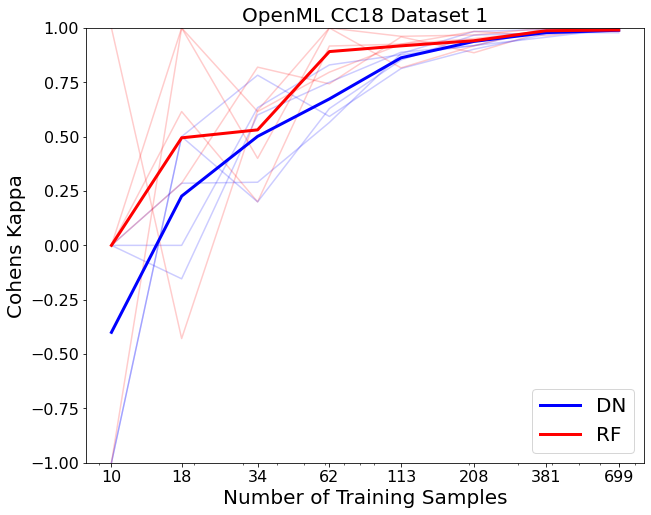

In [247]:
rf_evolution, dn_evolution = all_datasets_kappa[0]

dn_evolution_mean = np.mean(dn_evolution, axis=1)
rf_evolution_mean = np.mean(rf_evolution, axis=1)

yerr_dn = stats.sem(dn_evolution, axis=1)
yerr_rf = stats.sem(rf_evolution, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

for row in range(dn_evolution.shape[1]):
    ax.errorbar(
        training_sample_sizes,
        dn_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="b",
        alpha=0.2)
    
    ax.errorbar(
        training_sample_sizes,
        rf_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="r",
        alpha=0.2)
        
ax.errorbar(
    training_sample_sizes,
    dn_evolution_mean,
#     yerr=yerr_dn,
    linewidth=3,
    c="b",
    alpha=1,
    label="DN",
)
ax.errorbar(
    training_sample_sizes,
    rf_evolution_mean,
#     yerr=yerr_rf,
    linewidth=3,
    c="r",
    alpha=1,
    label="RF",
)

ax.set_xscale('log')
ax.set_xticks(training_sample_sizes)
ax.set_xticklabels(training_sample_sizes)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Number of Training Samples", fontsize=20)
plt.ylabel("Cohens Kappa", fontsize=20)
plt.title("OpenML CC18 Dataset 1", fontsize=20)

plt.ylim((-1,1))

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels, prop={"size": 20})

plt.savefig("/Users/michaelainsworth/Documents/DS_CS_Work/Git/rf-dn-paper/Figures/kappa_ds1_1")

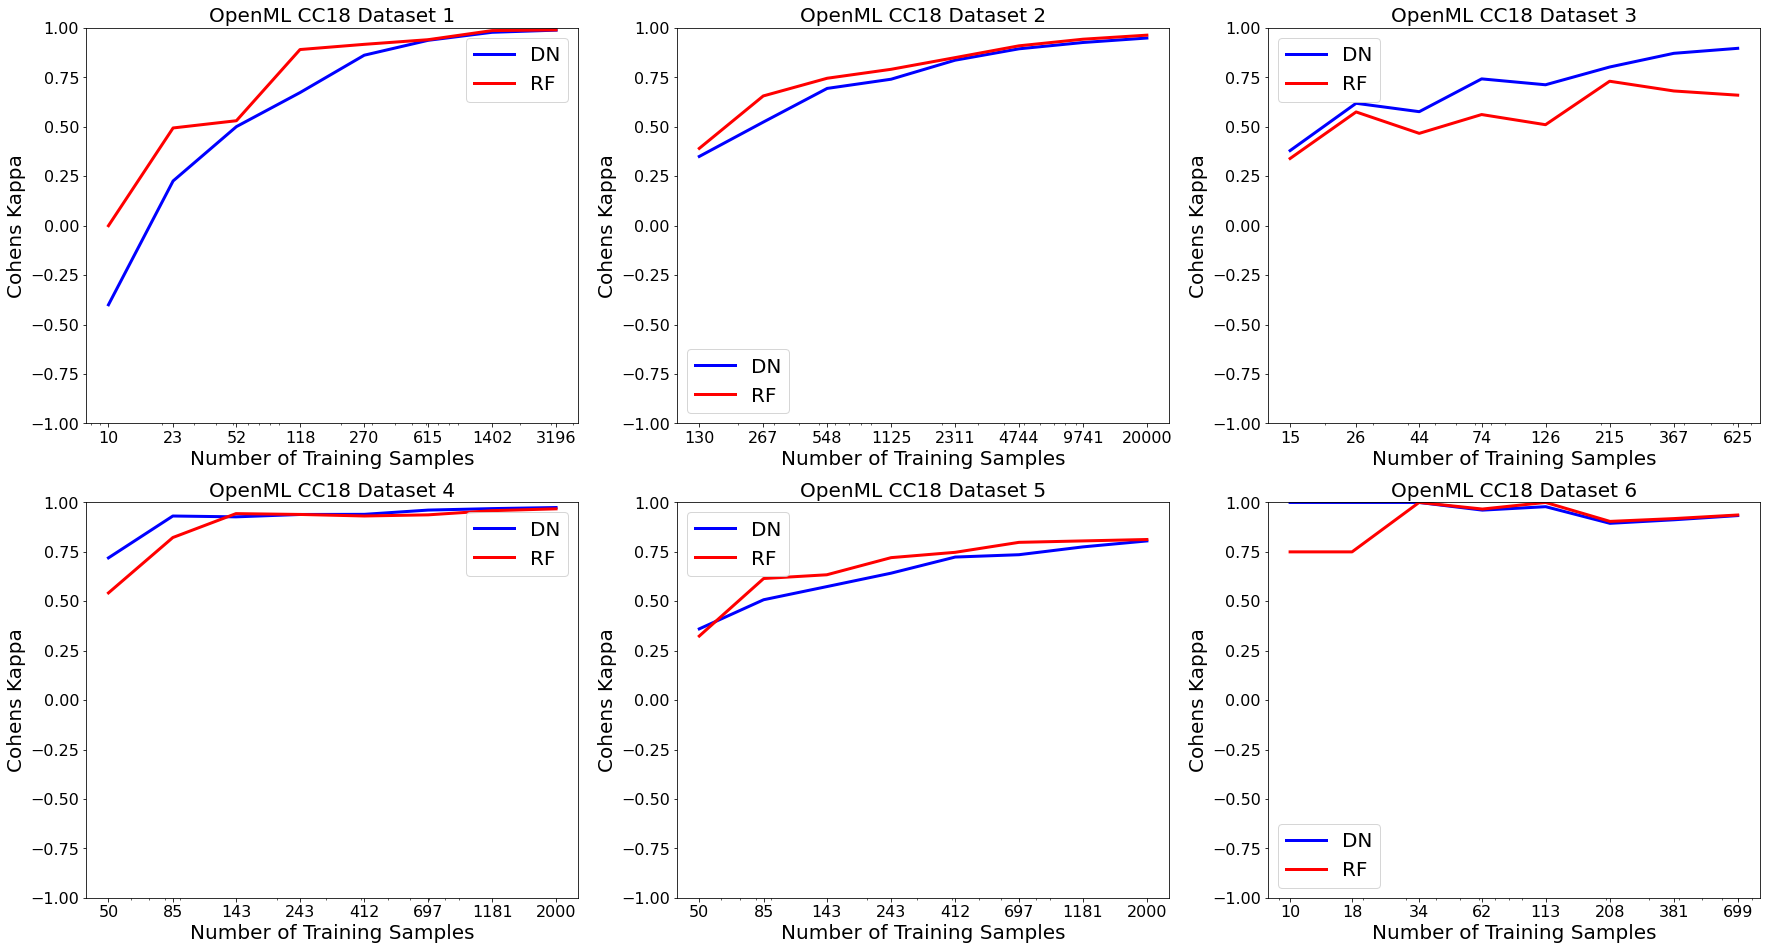

In [252]:
fig = plt.figure(figsize=(30,16))
plt.tight_layout()

for key in range(6):
    rf,dn = all_datasets_kappa[key][0],all_datasets_kappa[key][1]
    dn_evolution_mean = np.nanmean(dn, axis=1)
    rf_evolution_mean = np.nanmean(rf, axis=1)

    yerr_dn = stats.sem(dn_evolution, axis=1)
    yerr_rf = stats.sem(rf_evolution, axis=1)

    ax = plt.subplot(2,3,key+1)

#     for row in range(dn_evolution.shape[1]):
#         if dn[:,key].all():
#             ax.errorbar(
#                 all_sample_sizes[key],
#                 dn[:,key],
#             #     yerr=yerr_dn,
#                 linewidth=1.5,
#                 c="b",
#                 alpha=0.2)
#         if rf[:,key].all():
#             ax.errorbar(
#                 all_sample_sizes[key],
#                 rf[:,key],
#             #     yerr=yerr_dn,
#                 linewidth=1.5,
#                 c="r",
#                 alpha=0.2)

    ax.errorbar(
        all_sample_sizes[key],
        dn_evolution_mean,
    #     yerr=yerr_dn,
        linewidth=3,
        c="b",
        alpha=1,
        label="DN",
    )
    ax.errorbar(
        all_sample_sizes[key],
        rf_evolution_mean,
    #     yerr=yerr_rf,
        linewidth=3,
        c="r",
        alpha=1,
        label="RF",
    )

    ax.set_xscale('log')
    ax.set_xticks(all_sample_sizes[key])
    ax.set_xticklabels(all_sample_sizes[key])


    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlabel("Number of Training Samples", fontsize=20)
    plt.ylabel("Cohens Kappa", fontsize=20)
    plt.title("OpenML CC18 Dataset " + str(key + 1), fontsize=20)

    plt.ylim((-1,1))

    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    ax.legend(handles, labels, prop={"size": 20})

plt.savefig("/Users/michaelainsworth/Documents/DS_CS_Work/Git/rf-dn-paper/Figures/kappa_ds1t6_1")

# Multi Trial CV

In [ ]:
all_datasets_kappa_mt = {}
all_sample_sizes = []

for dataset in range(6):
    
    X = X_data_list[dataset]
    y = y_data_list[dataset]
    
    
    parameters = {
        'hidden_layer_sizes' : [20,100,180,260,340,400],
        'alpha' : [0.0001,0.001,0.01,0.1]
    }

    p = X.shape[1]
    l = list(set([round(p/4),round(np.sqrt(p)),round(p/3),round(p/1.5),round(p)]))
    parameters_rf = {
        'max_features' : l
    }
    print(parameters_rf)

    mlp = MLPClassifier(max_iter=200)
    clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=None, verbose=1)
    clf.fit(X, y)

    rf = RandomForestClassifier(n_estimators=500)
    clfrf = GridSearchCV(rf, parameters_rf, n_jobs=-1, verbose=1)
    clfrf.fit(X, y)

    allparams = clf.cv_results_['params']
    allparamsrf = clfrf.cv_results_['params']

    best_params = clf.best_params_
    best_paramsrf = clfrf.best_params_

    
    temp = np.log10((len(np.unique(y))) * 5)
    t = (np.log10(X.shape[0]) - temp) / 7
    training_sample_sizes = []
    for i in range(8):
        training_sample_sizes.append(round(np.power(10,temp + i*t)))
    print(training_sample_sizes)

    all_sample_sizes.append(training_sample_sizes)

    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    trials = 5

    rf_evolution = np.zeros((len(training_sample_sizes),5*trials))
    dn_evolution = np.zeros((len(training_sample_sizes),5*trials))
    
    ss_inds = random_sample_new(X, training_sample_sizes)
#     print(ss_inds)

        
    
    for trial in range(trials):
        for sample_size_index, max_sample_size in enumerate(training_sample_sizes):
    #         s = random_sample(X, max_sample_size)
    #         X_new = X[s]
    #         y_new = y[s]
            X_new = X[ss_inds[sample_size_index]]
            y_new = y[ss_inds[sample_size_index]]

            rf = RandomForestClassifier(**best_paramsrf, n_estimators=500)
            mlp = MLPClassifier(**best_params)

            kf = KFold(n_splits=5, shuffle=True)

            k_index=0
            for train_index, test_index in kf.split(X_new):

                X_train, X_test = X_new[train_index], X_new[test_index]
                y_train, y_test = y_new[train_index], y_new[test_index]

                rf.fit(X_train, y_train)
                y_pred_rf = rf.predict(X_test)

                k_rf = cohen_kappa_score(y_test, y_pred_rf)
                rf_evolution[sample_size_index][k_index + 5*trial] = k_rf


                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)

                k = cohen_kappa_score(y_test, y_pred)
                dn_evolution[sample_size_index][k_index + 5*trial] = k

                k_index += 1

        print(dn_evolution)
        print(rf_evolution)

        all_datasets_kappa_mt[dataset] = [rf_evolution, dn_evolution]


In [254]:
%store all_datasets_kappa_mt

Stored 'all_datasets_kappa_mt' (dict)


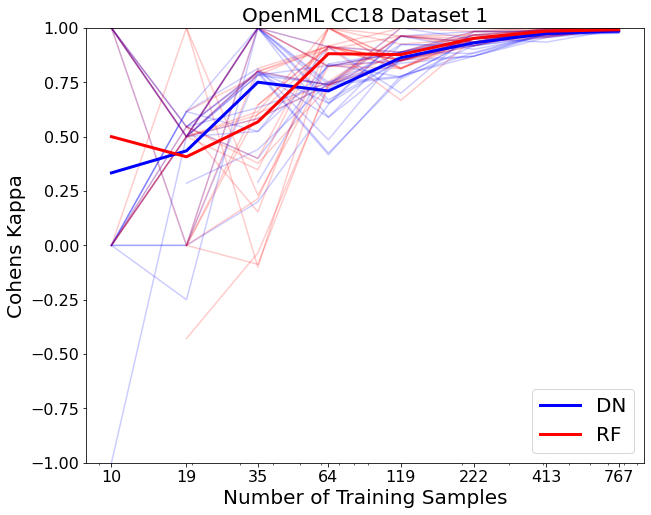

In [288]:
rf_evolution, dn_evolution = all_datasets_kappa_mt[0]

dn_evolution_mean = np.nanmean(dn_evolution, axis=1)
rf_evolution_mean = np.nanmean(rf_evolution, axis=1)

yerr_dn = stats.sem(dn_evolution, axis=1)
yerr_rf = stats.sem(rf_evolution, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

for row in range(dn_evolution.shape[1]):
    ax.errorbar(
        training_sample_sizes,
        dn_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="b",
        alpha=0.2)
    
    ax.errorbar(
        training_sample_sizes,
        rf_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="r",
        alpha=0.2)
        
ax.errorbar(
    training_sample_sizes,
    dn_evolution_mean,
#     yerr=yerr_dn,
    linewidth=3,
    c="b",
    alpha=1,
    label="DN",
)
ax.errorbar(
    training_sample_sizes,
    rf_evolution_mean,
#     yerr=yerr_rf,
    linewidth=3,
    c="r",
    alpha=1,
    label="RF",
)

ax.set_xscale('log')
ax.set_xticks(training_sample_sizes)
ax.set_xticklabels(training_sample_sizes)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Number of Training Samples", fontsize=20)
plt.ylabel("Cohens Kappa", fontsize=20)
plt.title("OpenML CC18 Dataset 1", fontsize=20)

plt.ylim((-1,1))

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels, prop={"size": 20})

plt.savefig("/Users/michaelainsworth/Documents/DS_CS_Work/Git/rf-dn-paper/Figures/kappa_ds1_mt")

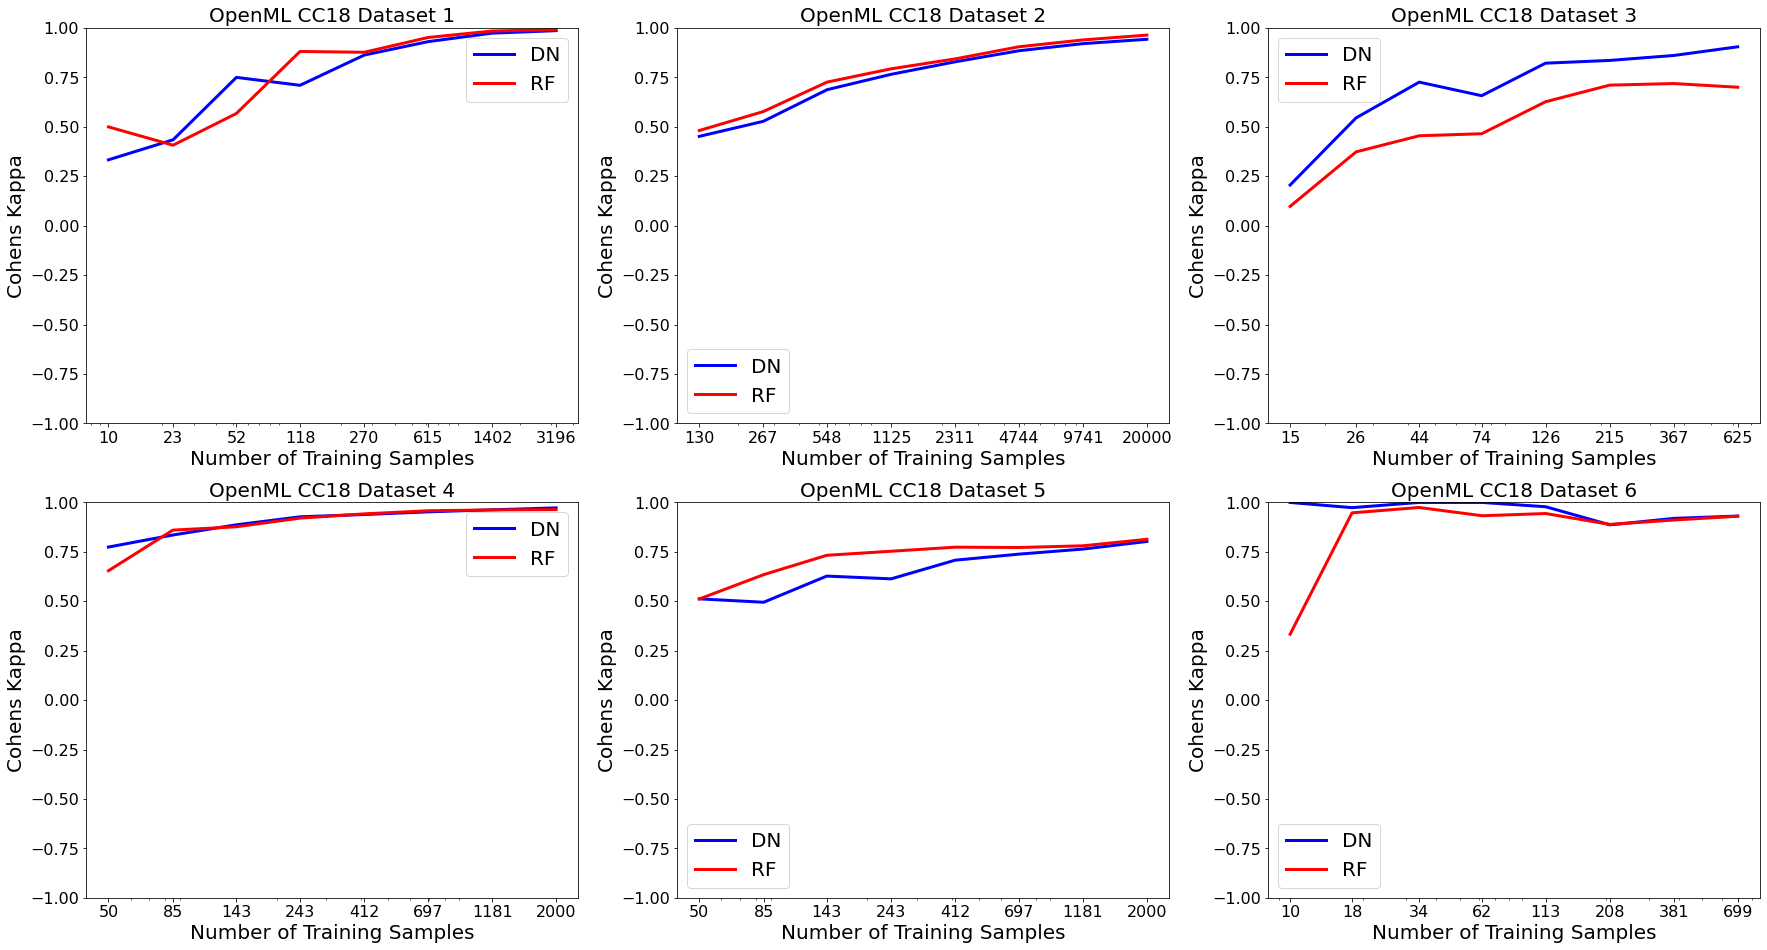

In [256]:
fig = plt.figure(figsize=(30,16))
plt.tight_layout()

for key in range(6):
    rf,dn = all_datasets_kappa_mt[key][0],all_datasets_kappa_mt[key][1]
    dn_evolution_mean = np.nanmean(dn, axis=1)
    rf_evolution_mean = np.nanmean(rf, axis=1)

    yerr_dn = stats.sem(dn_evolution, axis=1)
    yerr_rf = stats.sem(rf_evolution, axis=1)

    ax = plt.subplot(2,3,key+1)

#     for row in range(dn_evolution.shape[1]):
#         if dn[:,key].all():
#             ax.errorbar(
#                 all_sample_sizes[key],
#                 dn[:,key],
#             #     yerr=yerr_dn,
#                 linewidth=1.5,
#                 c="b",
#                 alpha=0.2)
#         if rf[:,key].all():
#             ax.errorbar(
#                 all_sample_sizes[key],
#                 rf[:,key],
#             #     yerr=yerr_dn,
#                 linewidth=1.5,
#                 c="r",
#                 alpha=0.2)

    ax.errorbar(
        all_sample_sizes[key],
        dn_evolution_mean,
    #     yerr=yerr_dn,
        linewidth=3,
        c="b",
        alpha=1,
        label="DN",
    )
    ax.errorbar(
        all_sample_sizes[key],
        rf_evolution_mean,
    #     yerr=yerr_rf,
        linewidth=3,
        c="r",
        alpha=1,
        label="RF",
    )

    ax.set_xscale('log')
    ax.set_xticks(all_sample_sizes[key])
    ax.set_xticklabels(all_sample_sizes[key])


    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlabel("Number of Training Samples", fontsize=20)
    plt.ylabel("Cohens Kappa", fontsize=20)
    plt.title("OpenML CC18 Dataset " + str(key + 1), fontsize=20)

    plt.ylim((-1,1))

    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    ax.legend(handles, labels, prop={"size": 20})

plt.savefig("/Users/michaelainsworth/Documents/DS_CS_Work/Git/rf-dn-paper/Figures/kappa_ds1t6mt")

# CV on Only Largest Sample Size

In [ ]:
all_datasets_kappa_cvl1 = {}
all_sample_sizes = []
all_parameters = []

for dataset in range(18):
    
    print('Dataset: ', dataset)

    X = X_data_list[dataset]
    y = y_data_list[dataset]
    
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
    parameters = {
        'hidden_layer_sizes' : [20,100,180,260,340,400],
        'alpha' : [0.0001,0.001,0.01,0.1]
    }

    p = X.shape[1]
    l = list(set([round(p/4),round(np.sqrt(p)),round(p/3),round(p/1.5),round(p)]))
    parameters_rf = {
        'max_features' : l
    }

    mlp = MLPClassifier(max_iter=200)
    clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=None, verbose=1)
    clf.fit(X, y)

    rf = RandomForestClassifier(n_estimators=500)
    clfrf = GridSearchCV(rf, parameters_rf, n_jobs=-1, verbose=1)
    clfrf.fit(X, y)

    allparams = clf.cv_results_['params']
    allparamsrf = clfrf.cv_results_['params']

    best_params = clf.best_params_
    best_paramsrf = clfrf.best_params_

    all_parameters.append([best_params, best_paramsrf])

    
    rf_evolution = np.zeros((len(training_sample_sizes),5))
    dn_evolution = np.zeros((len(training_sample_sizes),5))
    
    kf = KFold(n_splits=5, shuffle=True)

    k_index=0
    for train_index, test_index in kf.split(X):
        print('CV Fold: ', k_index)

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]  
    
        temp = np.log10((len(np.unique(y))) * 5)
        t = (np.log10(X_train.shape[0]) - temp) / 7
        training_sample_sizes = []
        for i in range(8):
            training_sample_sizes.append(round(np.power(10,temp + i*t)))
        print(training_sample_sizes)
    
        ss_inds = random_sample_new(X_train, training_sample_sizes)
#         print(ss_inds)


        for sample_size_index, max_sample_size in enumerate(training_sample_sizes):
#             print('Sample Size Index:', sample_size_index)
    #         s = random_sample(X, max_sample_size)
    #         X_new = X[s]
    #         y_new = y[s]
            X_train_new = X_train[ss_inds[sample_size_index]]
            y_train_new = y_train[ss_inds[sample_size_index]]

            rf = RandomForestClassifier(**best_paramsrf, n_estimators=500)
            mlp = MLPClassifier(**best_params)

            rf.fit(X_train_new, y_train_new)
            y_pred_rf = rf.predict(X_test)

            k_rf = cohen_kappa_score(y_test, y_pred_rf)
            rf_evolution[sample_size_index][k_index] = k_rf


            mlp.fit(X_train_new, y_train_new)
            y_pred = mlp.predict(X_test)

            k = cohen_kappa_score(y_test, y_pred)
            dn_evolution[sample_size_index][k_index] = k
            
        k_index += 1
    
    all_sample_sizes.append(training_sample_sizes)

    print(dn_evolution)
    print(rf_evolution)
    
    all_datasets_kappa_cvl1[dataset] = [rf_evolution, dn_evolution]


In [282]:
# %store all_datasets_kappa_cvl
%store all_datasets_kappa_cvl1

Stored 'all_datasets_kappa_cvl1' (dict)


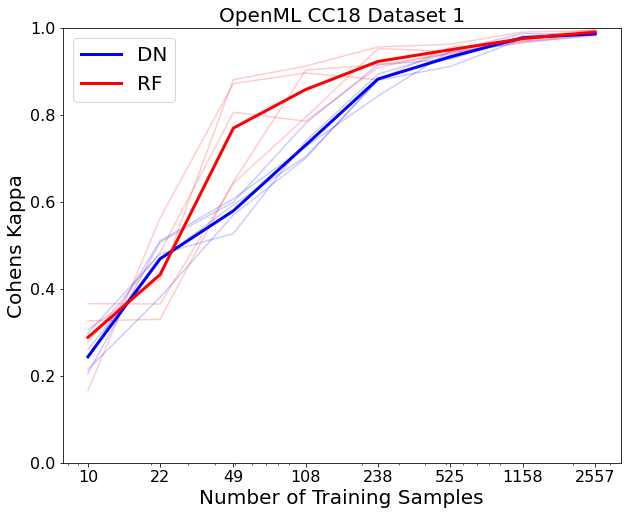

In [266]:
rf_evolution, dn_evolution = all_datasets_kappa_cvl[0]

dn_evolution_mean = np.mean(dn_evolution, axis=1)
rf_evolution_mean = np.mean(rf_evolution, axis=1)

yerr_dn = stats.sem(dn_evolution, axis=1)
yerr_rf = stats.sem(rf_evolution, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

for row in range(dn_evolution.shape[1]):
    ax.errorbar(
        training_sample_sizes,
        dn_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="b",
        alpha=0.2)

    ax.errorbar(
        training_sample_sizes,
        rf_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="r",
        alpha=0.2)

ax.errorbar(
    training_sample_sizes,
    dn_evolution_mean,
#     yerr=yerr_dn,
    linewidth=3,
    c="b",
    alpha=1,
    label="DN",
)
ax.errorbar(
    training_sample_sizes,
    rf_evolution_mean,
#     yerr=yerr_rf,
    linewidth=3,
    c="r",
    alpha=1,
    label="RF",
)

ax.set_xscale('log')
ax.set_xticks(training_sample_sizes)
ax.set_xticklabels(training_sample_sizes)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Number of Training Samples", fontsize=20)
plt.ylabel("Cohens Kappa", fontsize=20)
plt.title("OpenML CC18 Dataset 1", fontsize=20)

plt.ylim((0,1))

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels, prop={"size": 20})

#     plt.savefig("/Users/michaelainsworth/Documents/DS_CS_Work/Git/rf-dn-paper/Figures/kappa_ds1_cvl")

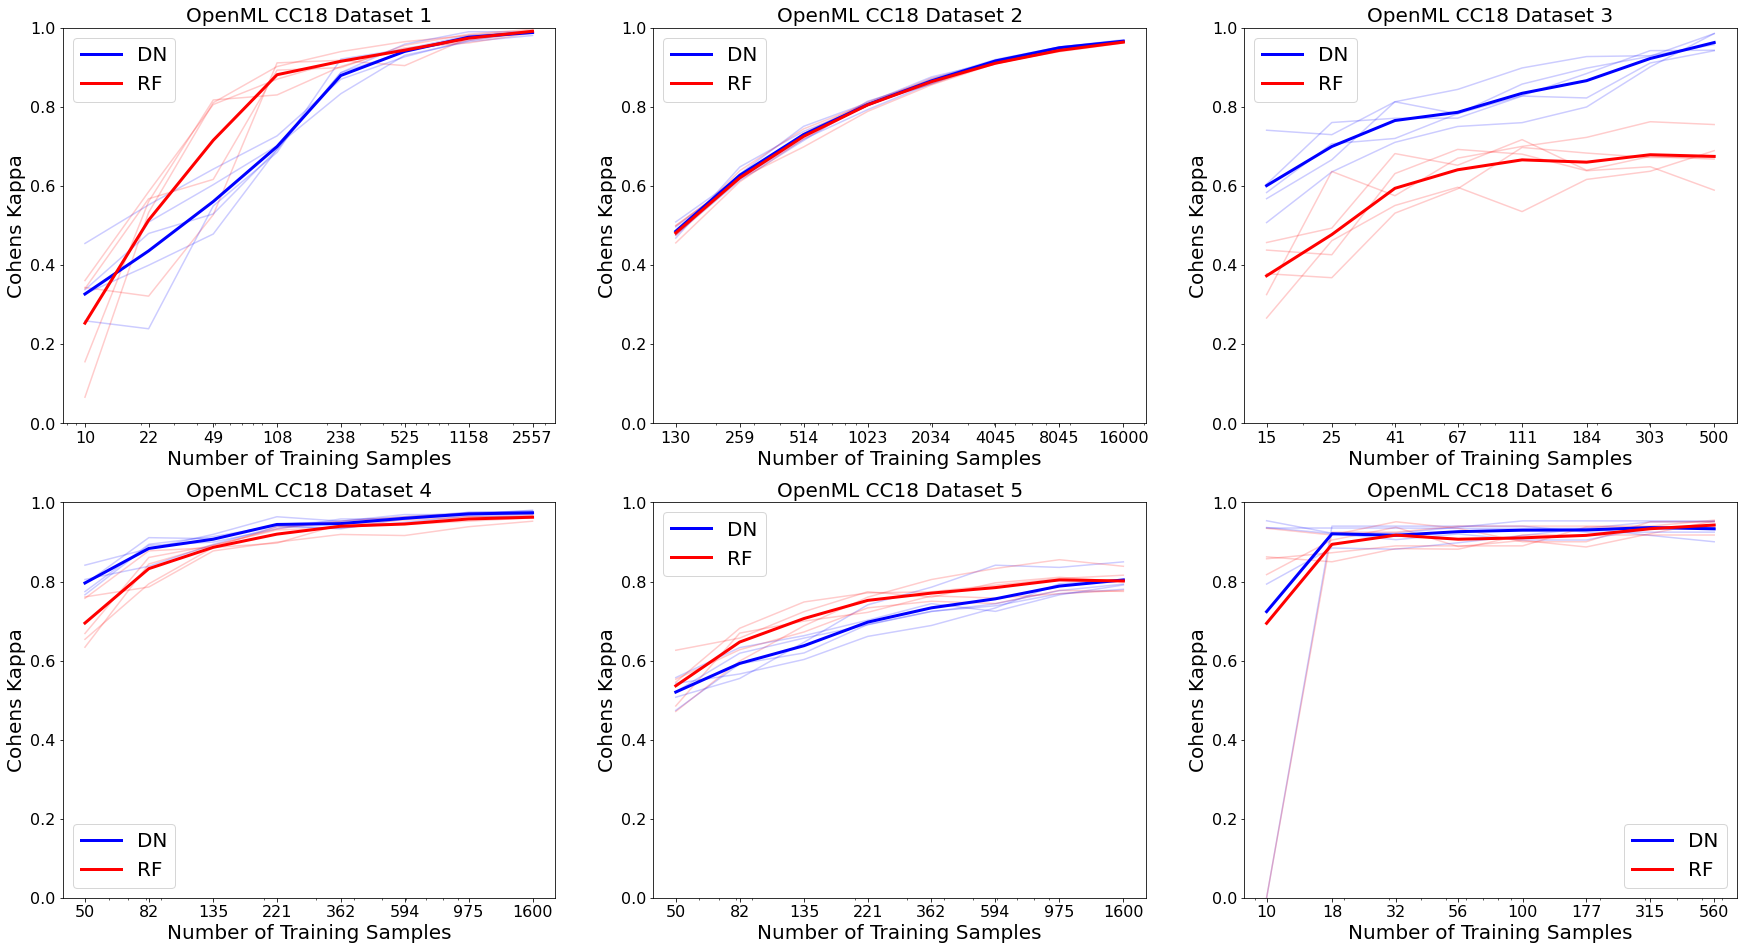

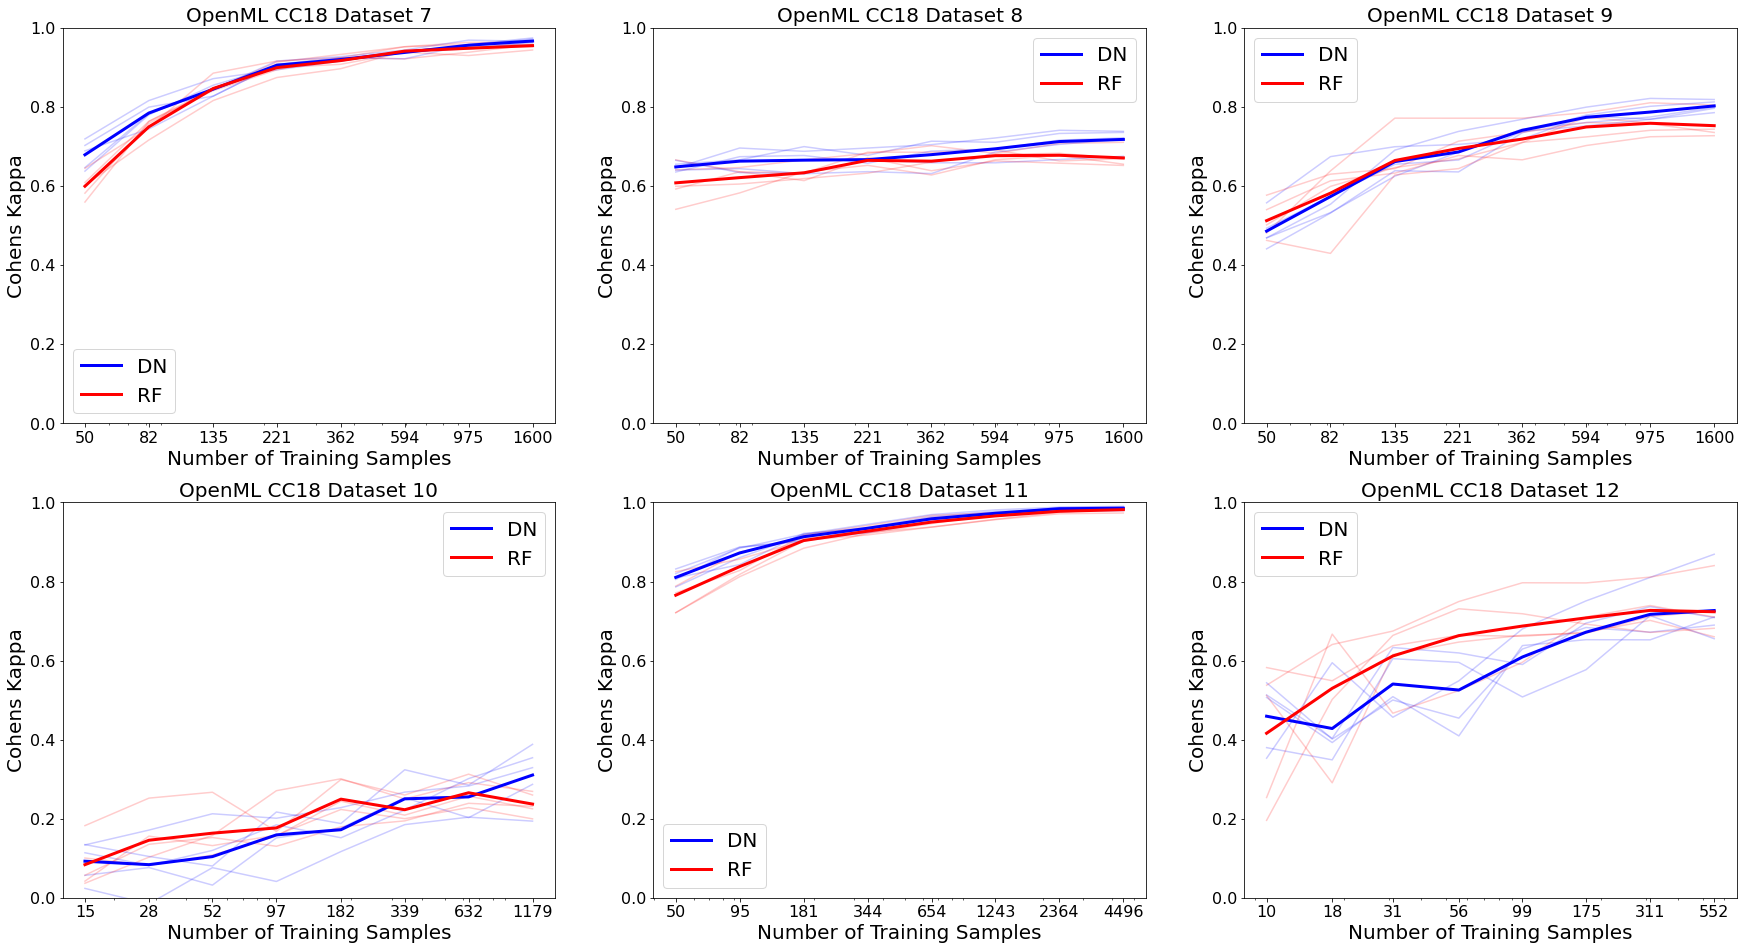

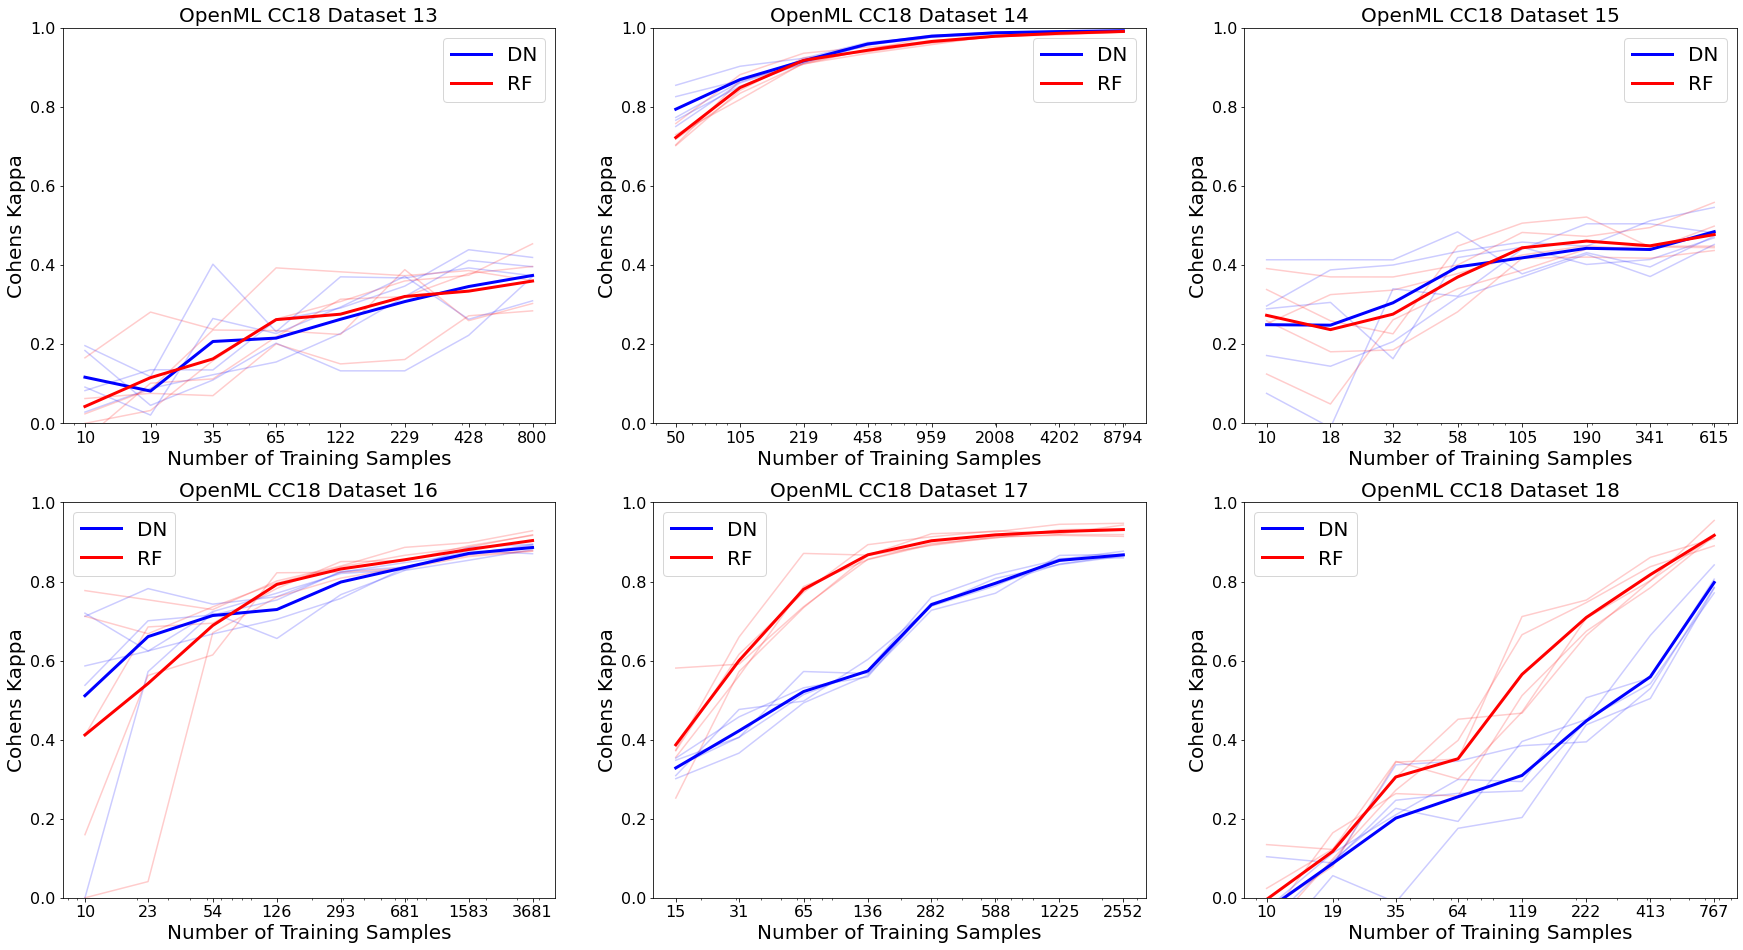

In [284]:
for plot in range(3):

    fig = plt.figure(figsize=(30,16))
    plt.tight_layout()

    for key in range(6):
        rf,dn = all_datasets_kappa_cvl1[key + 6*plot][0],all_datasets_kappa_cvl1[key + 6*plot][1]
        dn_evolution_mean = np.nanmean(dn, axis=1)
        rf_evolution_mean = np.nanmean(rf, axis=1)

        yerr_dn = stats.sem(dn_evolution, axis=1)
        yerr_rf = stats.sem(rf_evolution, axis=1)

        ax = plt.subplot(2,3,key+1)

        for row in range(dn.shape[1]):
            ax.errorbar(
                all_sample_sizes[key + 6*plot],
                dn[:,row],
            #     yerr=yerr_dn,
                linewidth=1.5,
                c="b",
                alpha=0.2)
            ax.errorbar(
                all_sample_sizes[key + 6*plot],
                rf[:,row],
            #     yerr=yerr_dn,
                linewidth=1.5,
                c="r",
                alpha=0.2)

        ax.errorbar(
            all_sample_sizes[key + 6*plot],
            dn_evolution_mean,
        #     yerr=yerr_dn,
            linewidth=3,
            c="b",
            alpha=1,
            label="DN",
        )
        ax.errorbar(
            all_sample_sizes[key + 6*plot],
            rf_evolution_mean,
        #     yerr=yerr_rf,
            linewidth=3,
            c="r",
            alpha=1,
            label="RF",
        )

        ax.set_xscale('log')
        ax.set_xticks(all_sample_sizes[key + 6*plot])
        ax.set_xticklabels(all_sample_sizes[key + 6*plot])


        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        plt.xlabel("Number of Training Samples", fontsize=20)
        plt.ylabel("Cohens Kappa", fontsize=20)
        plt.title("OpenML CC18 Dataset " + str(key + 6*plot + 1), fontsize=20)

        plt.ylim((0,1))

        handles, labels = ax.get_legend_handles_labels()
        handles = [h[0] for h in handles]
        ax.legend(handles, labels, prop={"size": 20})

#     plt.savefig("/Users/michaelainsworth/Documents/DS_CS_Work/Git/rf-dn-paper/Figures/kappa_ds1t6cvl")

In [285]:
df = pd.DataFrame(data=all_parameters)
df.columns = ['DN Parameters', 'RF Parameters']
df

,DN Parameters,RF Parameters
0,"{'alpha': 0.0001, 'hidden_layer_sizes': 400}",{'max_features': 36}
1,"{'alpha': 0.01, 'hidden_layer_sizes': 400}",{'max_features': 4}
2,"{'alpha': 0.01, 'hidden_layer_sizes': 400}",{'max_features': 3}
3,"{'alpha': 0.1, 'hidden_layer_sizes': 400}",{'max_features': 15}
4,"{'alpha': 0.01, 'hidden_layer_sizes': 400}",{'max_features': 9}
5,"{'alpha': 0.001, 'hidden_layer_sizes': 100}",{'max_features': 2}
6,"{'alpha': 0.1, 'hidden_layer_sizes': 340}",{'max_features': 8}
7,"{'alpha': 0.001, 'hidden_layer_sizes': 180}",{'max_features': 2}
8,"{'alpha': 0.1, 'hidden_layer_sizes': 20}",{'max_features': 7}
9,"{'alpha': 0.01, 'hidden_layer_sizes': 20}",{'max_features': 3}
